In [ ]:
from glob import glob
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dscribe.descriptors import ACSF
from mlptools.atoms.extract_atoms import extract_atoms

In [ ]:
path2atoms = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/depth15/0deg_1000eV/atoms_near_injection'
# path2atoms = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/depth15/0deg_1000eV/surface_atoms'
ase_atoms_path = glob(f'{path2atoms}/*.pkl')
ase_atoms = []
for path in ase_atoms_path:
    with open(path, 'rb') as f:
        ase_atom = pickle.load(f)
        ase_atom.set_chemical_symbols(f'Si{ase_atom.get_global_number_of_atoms()}')

        ase_atoms.append(ase_atom)


g2_params = np.array(
        [[8.257 , 1.    ],
       [4.544 , 1.348 ],
       [2.501 , 1.817 ],
       [1.376 , 2.449 ],
       [0.7573, 3.302 ],
       [0.4168, 4.451 ]])
g4_params = np.array([[ 0.05556,  1.     , -1.     ],
        [ 0.05556,  1.     ,  1.     ],
        [ 0.05556,  6.     , -1.     ],
        [ 0.05556,  6.     ,  1.     ],
        [ 0.01389,  1.     , -1.     ],
        [ 0.01389,  1.     ,  1.     ],
        [ 0.01389,  6.     , -1.     ],
        [ 0.01389,  6.     ,  1.     ]])

In [ ]:
positions = ase_atoms[0].get_positions()

fig, ax = plt.subplots(figsize=(8, 10))
ax.scatter(positions[:, 0], positions[:, 2])

In [ ]:
acsf = ACSF(
    species=['Si'],
    r_cut=6,
    g2_params=g2_params,
    g4_params=g4_params,
    periodic=True
)

In [ ]:
path2save = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/depth15/0deg_1000eV/atoms_near_injection/csv'
x_range = [0, ase_atom.cell[0][0]]
y_range = [0, ase_atom.cell[1][1]]
z_range = [100, ase_atom.cell[2][2]]

col_names = [f'G2_{i}' for i in range(len(g2_params))] + [f'G4_{i}' for i in range(len(g4_params))]
for col in for col in sf_df.columns:     # plot horisontal line at min and max     plt.axvline(sf_df[col].min(), color='red')     plt.axvline(sf_df[col].max(), color='red')     plt.hist(sf_df[col], bins=100)     plt.title(col)     plt.show().columns:     # plot horisontal line at min and max     plt.axvline(sf_df[col].min(), color='red')     plt.axvline(sf_values_of_training_df[col].max(), color='red')     plt.hist(sf_df[col], bins=100)     plt.title(col)     plt.show()_list = []
for i, path in enumerate(ase_atoms_path):
    print(f'Processing {path}, {i} / {len(ase_atoms_path)}')
    frame_id = path.split('/')[-1].split('.')[0]
    with open(path, 'rb') as f:
        ase_atom = pickle.load(f)
        ase_atom.set_chemical_symbols(f'Si{ase_atom.get_global_number_of_atoms()}')

    extracted_ase_atom = extract_atoms(ase_atom, x_range, y_range, z_range)
    sf_value = acsf.create(extracted_ase_atom)
    sf_df = pd.DataFrame(data=sf_value[:, 1:], columns=col_names)
    sf_df[['x', 'y', 'z']] = extracted_ase_atom.get_positions()
    sf_df['frame_id'] = frame_id
    sf_df_list.append(sf_df)
    sf_df.to_csv(f'{path2save}/{frame_id}.csv', index=False)

In [ ]:
path2substrate = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/depth15/0deg_1000eV/atoms_near_injection/csv'
path_to_sf_values_of_training = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/94/three/03/sf_df.csv'
path2save = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/94/three/03/visualized_exptapolation'
sf_values_of_training_df = pd.read_csv(path_to_sf_values_of_training)

In [ ]:
# get min max dataframe
sf_min_max_df = sf_values_of_training_df.describe().loc[['min', 'max'], :].T

In [ ]:
# plot xyz of substrate which color shows the value of sf is within min max of training
all_extrapolation_num_each_sf = []
all_extrapolation_sf_value = []
for path_to_substrate_sf_csv in glob(f'{path2substrate}/*.csv'):
    frame_id = path_to_substrate_sf_csv.split('/')[-1].split('.')[0]
    print(frame_id)
    substrate_sf_df = pd.read_csv(path_to_substrate_sf_csv)
    sf_cols = list(filter(lambda x: 'G' in x, substrate_sf_df.columns))
    sf_values = substrate_sf_df[sf_cols].values
    min_mask = sf_values >= sf_min_max_df['min'].values
    max_mask = sf_values <= sf_min_max_df['max'].values
    mask = np.logical_and(min_mask, max_mask)
    num_extrapolation = np.sum(~mask, axis=1)
    num_extrapolation_each_sf = np.sum(~mask, axis=0).tolist()
    # get record np.any(~mask, axis=1) is true
    extracted_records = substrate_sf_df.loc[np.any(~mask, axis=1), :]
    all_extrapolation_sf_value.append(extracted_records)

    all_extrapolation_num_each_sf.append([frame_id] + num_extrapolation_each_sf)
    substrate_sf_df['num_extrapolation'] = num_extrapolation
    # if np.sum(num_extrapolation > 0) > 0:
    #     # break
    #     continue

    fig = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(111)
    ax.scatter(substrate_sf_df['x'], substrate_sf_df['z'], c=num_extrapolation, cmap='bwr')

    # save figure
    frame_id = path_to_substrate_sf_csv.split('/')[-1].split('.')[0]
    if np.sum(num_extrapolation > 0) > 0:
        fig.savefig(f'{path2save}/{frame_id}_extrapolated.png')
    else:
        fig.savefig(f'{path2save}/{frame_id}.png')

In [ ]:
all_extrapolation_each_sf_df = pd.DataFrame(data=all_extrapolation_num_each_sf, columns=['frame_id'] + sf_cols)

In [ ]:
all_extrapolation_each_sf_df[sf_cols].sum()

In [ ]:
all_extrapolation_sf_value_df = pd.concat(all_extrapolation_sf_value)

In [ ]:
all_extrapolation_sf_value_df

In [ ]:
for col in sf_values_of_training_df.columns:
    # plot horisontal line at min and max
    plt.axvline(sf_values_of_training_df[col].min(), color='red')
    plt.axvline(sf_values_of_training_df[col].max(), color='red')
    count = 0
    for val in all_extrapolation_sf_value_df[col].values:
        if val < sf_values_of_training_df[col].min() or val > sf_values_of_training_df[col].max():
            plt.axvline(val, color='green')
            count += 1
    print(f'Number of extrapolation {col}: {count}')
    plt.hist(sf_values_of_training_df[col], bins=100)
    plt.title(col)
    plt.show()

# LAMMPSでの計算結果

In [93]:
path2lmp_result = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/extrapolation_analysis"
path2mlpatoms = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/depth15/0deg_1000eV/atoms_near_injection"

In [94]:
from glob import glob
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
all_lmp_results = glob(f'{path2lmp_result}/frame*')
print(len(all_lmp_results))

path2save = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/depth15/0deg_1000eV/atoms_near_injection/lmp_input/fig'

100


In [ ]:
for lmp_result in all_lmp_results:
    with open(os.path.join(lmp_result, 'log.lammps'), 'r') as f:
        lines = [s.strip() for s in f.readlines()]
    extrapolation_lines = list(filter(lambda x: 'NNP EXTRAPOLATION WARNING' in x, lines))
    extrapolated_atom_idx = []
    for l in extrapolation_lines:
        splitted_l = list(filter(None, l.split(' ')))
        idx = splitted_l.index('ATOM:')
        extrapolated_atom_idx.append(int(splitted_l[idx + 1])-2)
    

    # load pickle
    frame_id = lmp_result.split('/')[-1]
    with open(os.path.join(path2mlpatoms, f'{frame_id}.pkl'), mode='rb') as f:
        ase_atoms = pickle.load(f)
        
    ase_atoms.set_chemical_symbols(f'Si{ase_atoms.get_global_number_of_atoms()}')
    extrapolation_df = pd.DataFrame(data=ase_atoms.get_positions(), columns=['x', 'y', 'z'])
    extrapolation_df['extrapolated'] = False
    extrapolation_df.loc[extrapolated_atom_idx, 'extrapolated'] = True

    print('-'*50)
    print(f'Frame: {frame_id}')
    print(f'Number of atoms: {len(ase_atoms)}')
    print(f'Number of extrapolated atoms: {len(extrapolated_atom_idx)}')
    print('-'*50)

    fig, ax = plt.subplots(figsize=(8, 10))
    # change alpha depends on extrapolation
    not_extrapolated = extrapolation_df[extrapolation_df['extrapolated'] == False]
    ax.scatter(not_extrapolated['x'], not_extrapolated['z'], c='blue', alpha=0.5)
    extrapolated_df = extrapolation_df[extrapolation_df['extrapolated'] == True]
    ax.scatter(extrapolated_df['x'], extrapolated_df['z'], c='red', alpha=1.0)
    # ax.scatter(extrapolation_df['x'], extrapolation_df['z'], c=extrapolation_df['extrapolated'], cmap='bwr', alpha=0.5)
    ax.set_xlim([0, ase_atoms.cell[0][0]])
    ax.set_ylim([0, ase_atoms.cell[2][2]])
    fig.savefig(f'{path2save}/{frame_id}.png')

In [100]:
all_extrapolated_lines = []
extrapolated_sf_value = []
for lmp_result in all_lmp_results:
    with open(os.path.join(lmp_result, 'log.lammps'), 'r') as f:
        lines = [s.strip() for s in f.readlines()]
    extrapolation_lines = list(filter(lambda x: 'NNP EXTRAPOLATION WARNING' in x, lines))
    for l in extrapolation_lines:
        splitted_l = list(filter(None, l.split(' ')))
        all_extrapolated_lines.append(splitted_l)
        print(' '.join(splitted_l[11:]))
        extrapolated_sf_value.append(float(splitted_l[16]))
        # print(f"SYMFUNC: {splitted_l[12]}, TYPE: {splitted_l[14]}")

SYMFUNC: 6 TYPE: 2 VALUE: 2.290E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 1.193E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 3.483E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 2.781E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 2.969E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 5.367E-02 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 1.509E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 1.511E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 5.611E-02 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 4.698E-02 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 2.131E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 2.601E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 1.097E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 1.120E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6 TYPE: 2 VALUE: 1.381E-01 MIN: 0.000E+00 MAX: 3.165E-02
SYMFUNC: 6

(-0.2, 0.2)

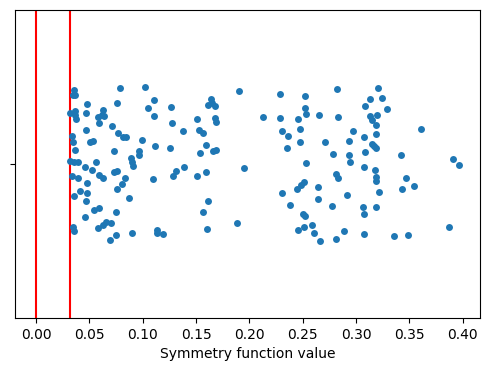

In [111]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))
ax.axvline(0.0, color='red')
ax.axvline(3.165E-02, color='red')
sns.stripplot(x=extrapolated_sf_value, ax=ax)
ax.set_xlabel('Symmetry function value')
ax.set_ylim([-.2, .2])

In [91]:
all_extrapolated_lines

[['###',
  'NNP',
  'EXTRAPOLATION',
  'WARNING',
  '###',
  'STRUCTURE:',
  '0',
  'ATOM:',
  '4028',
  'ELEMENT:',
  'Si',
  'SYMFUNC:',
  '6',
  'TYPE:',
  '2',
  'VALUE:',
  '2.290E-01',
  'MIN:',
  '0.000E+00',
  'MAX:',
  '3.165E-02'],
 ['###',
  'NNP',
  'EXTRAPOLATION',
  'WARNING',
  '###',
  'STRUCTURE:',
  '0',
  'ATOM:',
  '7560',
  'ELEMENT:',
  'Si',
  'SYMFUNC:',
  '6',
  'TYPE:',
  '2',
  'VALUE:',
  '1.193E-01',
  'MIN:',
  '0.000E+00',
  'MAX:',
  '3.165E-02'],
 ['###',
  'NNP',
  'EXTRAPOLATION',
  'WARNING',
  '###',
  'STRUCTURE:',
  '0',
  'ATOM:',
  '11470',
  'ELEMENT:',
  'Si',
  'SYMFUNC:',
  '6',
  'TYPE:',
  '2',
  'VALUE:',
  '3.483E-01',
  'MIN:',
  '0.000E+00',
  'MAX:',
  '3.165E-02'],
 ['###',
  'NNP',
  'EXTRAPOLATION',
  'WARNING',
  '###',
  'STRUCTURE:',
  '0',
  'ATOM:',
  '4027',
  'ELEMENT:',
  'Si',
  'SYMFUNC:',
  '6',
  'TYPE:',
  '2',
  'VALUE:',
  '2.781E-01',
  'MIN:',
  '0.000E+00',
  'MAX:',
  '3.165E-02'],
 ['###',
  'NNP',
  'EXTRAPOLAT